<font color='blue' size=5><b>Комментарий ревьюера</b></font>

<font color='blue'>Привет, Алексей! Меня зовут Павел Григорьев, и я буду проверять этот проект.<br>Моя основная цель - не указать на совершённые тобой ошибки, а поделиться своим опытом и помочь тебе совершенствоваться как профессионалу.<br>Спасибо за проделанную работу! Предлагаю общаться на «ты».</font>
<details>
	<summary><u>Инструкция по организационным моментам (кликабельно)</u></summary>
<font color='blue'>Я буду использовать различные цвета, чтобы было удобнее воспринимать мои комментарии:</font>


---


<font color='blue'>синий текст - просто текст комментария</font>

<font color='green'>✔️ и зеленый текст - все отлично</font>

<font color='orange'>⚠️ и оранжевый текст - сделано все правильно, однако есть рекомендации, на что стоит обратить внимание</font>

<font color='red'>❌ и красный текст - есть недочеты</font>


</details>    
    </br>
<font color='blue'>Пожалуйста, не удаляй мои комментарии в случае возврата работы, так будет проще разобраться, какие были недочеты, а также сразу увидеть исправленное. </font>

Ответы на мои комментарии лучше тоже помечать.
Например: <font color='purple'><b>Комментарий студента</b></font>

<font color='blue'><b>Давай смотреть, что получилось!</b></font>

# Определение стоимости автомобилей

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

## Подготовка данных

In [2]:
! pip install -q jupyternotify

In [3]:
# Уведомление о завершение работы определенного ячейка (очень пригодится для машинного обучения)
import jupyternotify
%load_ext jupyternotify

<IPython.core.display.Javascript object>

In [4]:
# Подключаем все необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats as st
# Время обучения модели
import timeit
from lightgbm import LGBMRegressor
# Вызов библиотеки для отключения предупреждения
import warnings

# Разбиение на обучающую, валидационную и тестовую выборку
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
# Применим кроссвалидацию для повышения качеств обучения
# Для константной модели
from sklearn.dummy import DummyRegressor
from catboost import CatBoostRegressor

# Масштабируемость модели
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder

# и для машинного обучения разными способами (по условию мы выбираем линейную регрессию):
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import (
    # Точность модели
    accuracy_score,
    # Матрицы ошибок (для борьбы с дисбалансом)
    confusion_matrix, 
    # Полнота
    recall_score, 
    # Точность
    precision_score, 
    # F1-мера
    f1_score,
    # Метрика AUC-ROC
    roc_auc_score,
    roc_curve,
    # MSE
    mean_squared_error,
    mean_absolute_error,
    fbeta_score, 
    make_scorer
)

# Контроль выборки
from sklearn.utils import shuffle

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Хорошее оформление импортов! \
Импорты собраны в одной ячейке, разделены на функциональные группы пустой строкой.</font>

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='orange'> Неужели всё это понадобится в проекте? Лишние импорты лучше удалить, ведь это ненужные зависимости.</font>

<font color='purple'><b>Комментарий студента</b> Да, действительно оставил ненужные, но я это не случайно оставил, чтобы в ходе отладки не пришлось снова возвращаться здесь подключать другие библиотеки. Я это разместил как шаблон подключения всех библиотек, после принятия проекта я уберу лишние библиотеки </font>

### Загрузим данные

In [5]:
# Получаем датасет
try:
    # С локального файла
    try:
        df = pd.read_csv('autos.csv')
    except:
        df = pd.read_csv('/datasets/autos.csv')
except:
    print('Отсутствует датасет. Проверьте путь файла')

### Изучим данные

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  Repaired           283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

**Дополнительные информация:**

**Признаки**
- `DateCrawled` — дата скачивания анкеты из базы
- `VehicleType` — тип автомобильного кузова
- `RegistrationYear` — год регистрации автомобиля
- `Gearbox` — тип коробки передач
- `Power` — мощность (л. с.)
- `Model` — модель автомобиля
- `Kilometer` — пробег (км)
- `RegistrationMonth` — месяц регистрации автомобиля
- `FuelType` — тип топлива
- `Brand` — марка автомобиля
- `Repaired` — была машина в ремонте или нет
- `DateCreated` — дата создания анкеты
- `NumberOfPictures` — количество фотографий автомобиля
- `PostalCode` — почтовый индекс владельца анкеты (пользователя)
- `LastSeen` — дата последней активности пользователя

**Целевой признак**
- `Price` — цена (евро)

In [7]:
df.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [8]:
df.describe()

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


Тут можно заметить странное, что в колонке "год регистрации автомобиля" есть 1000 и 9999. Скорее всего это аномальное значения. Также в данный момент не существуют машин, у которых мощностей двигателя больше 143 л.с. А также странно получилось, что машина выставлена в продажах бесплатно. Ну, может быть они хотят быстрее избавиться от них, а может "ради прикола" выставили в продажах, но все равно устраняем их

Text(0, 0.5, 'Стоимость ЕВРО')

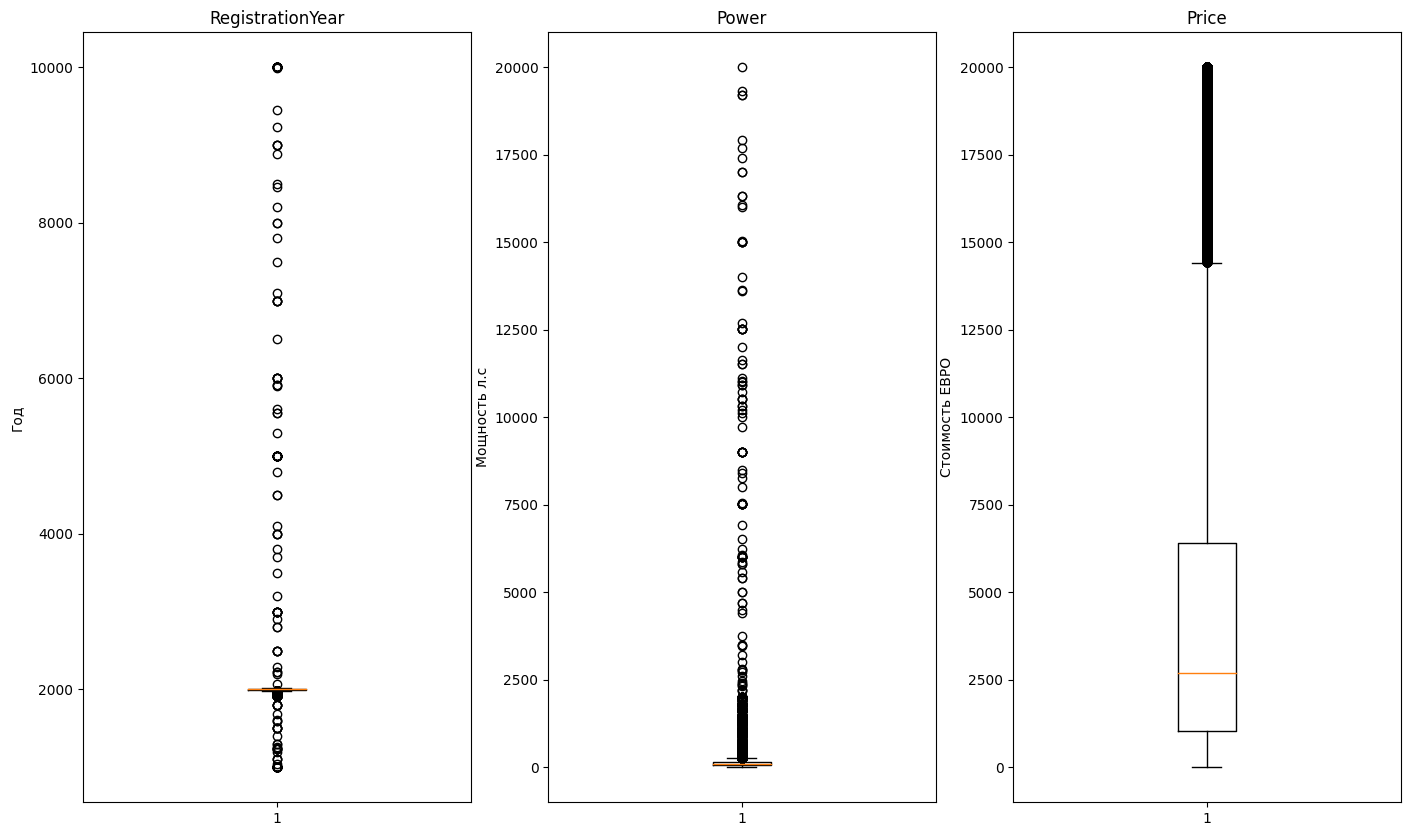

In [9]:
fig, axs = plt.subplots(1, 3, figsize=(17, 10))

axs[0].boxplot(df['RegistrationYear'])
axs[0].set_title('RegistrationYear')
axs[0].set_ylabel('Год')
        
axs[1].boxplot(df['Power'])
axs[1].set_title('Power')
axs[1].set_ylabel('Мощность л.с')

axs[2].boxplot(df['Price'])
axs[2].set_title('Price')
axs[2].set_ylabel('Стоимость ЕВРО')

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Данные загружены корректно, первичный осмотр проведен.</font>

### Заполним пропущенные значения и обработаем аномалии в столбцах. Если среди признаков имеются неинформативные, то удалим их.

In [10]:
# Скорпируем
df_clean = df.copy()

Удаляем аномальные значения

In [11]:
# Смотрим дату скачивания анкеты из базы и год регистрации автомобиля, 
# т.к. год регистрации автомобиля не должен позже дату скачивания анкеты
df_clean['DateCrawled'].max()

'2016-04-07 14:36:58'

In [12]:
# Очистим
# Год регистрации автомобиля
df_clean = df_clean[df_clean['RegistrationYear'] > (df_clean.describe()['RegistrationYear']['50%'] - df_clean.describe()['RegistrationYear']['std'])]
df_clean = df_clean[df_clean['RegistrationYear'] < 2017]

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'> Обрати внимание на даты в DateCrawled в сравнении с RegistrationYear</font>

<font color='purple'><b>Комментарий студента</b> А да, не заметил, хорошо спрятано) </font>

In [13]:
# Мощность двигателя л.с
df_clean = df_clean[df_clean['Power'] > 5]

# В 2016 году шведский суперкар с названием Koenigsegg Regera имеет 1800 л.с. и двигатель у него является самым мощным в мире
df_clean = df_clean[df_clean['Power'] < 1800]

In [14]:
# Бесплатных автомобилей устраняем 
df_clean = df_clean[df_clean['Price'] > 1]

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'>Выбросить машину в Германии удовольствие не из дешёвых, я бы не считал дешёвые машины аномалией ))</font>

<font color='purple'><b>Комментарий студента</b> Ну ладно, оставим тачку со стоимостью больше одного евро, может кому то повезет успеть первым ухватиться БМВ 7er со стоимостью 2 евро)) Мечтать не вредно </font>

In [15]:
df_clean[df_clean.index==3742]

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
3742,2016-03-23 17:30:02,2,sedan,2002,auto,272,7er,5000,9,petrol,bmw,NaN,2016-03-23 00:00:00,0,65183,2016-03-24 21:28:34


In [16]:
df_clean.describe()

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,PostalCode
count,295937.000000,295937.000000,295937.000000,295937.000000,295937.000000,295937.0,295937.000000
mean,4865.070944,2002.823043,121.330158,128300.280127,5.996080,0.0,51241.180390
std,4611.936652,6.536964,60.845880,36737.164496,3.582654,0.0,25782.523619
min,2.000000,1923.000000,6.000000,5000.000000,0.000000,0.0,1067.000000
25%,1350.000000,1999.000000,75.000000,125000.000000,3.000000,0.0,30926.000000
50%,3200.000000,2003.000000,111.000000,150000.000000,6.000000,0.0,50259.000000
75%,6999.000000,2007.000000,150.000000,150000.000000,9.000000,0.0,72108.000000
max,20000.000000,2016.000000,1799.000000,150000.000000,12.000000,0.0,99998.000000


Text(0, 0.5, 'Стоимость ЕВРО')

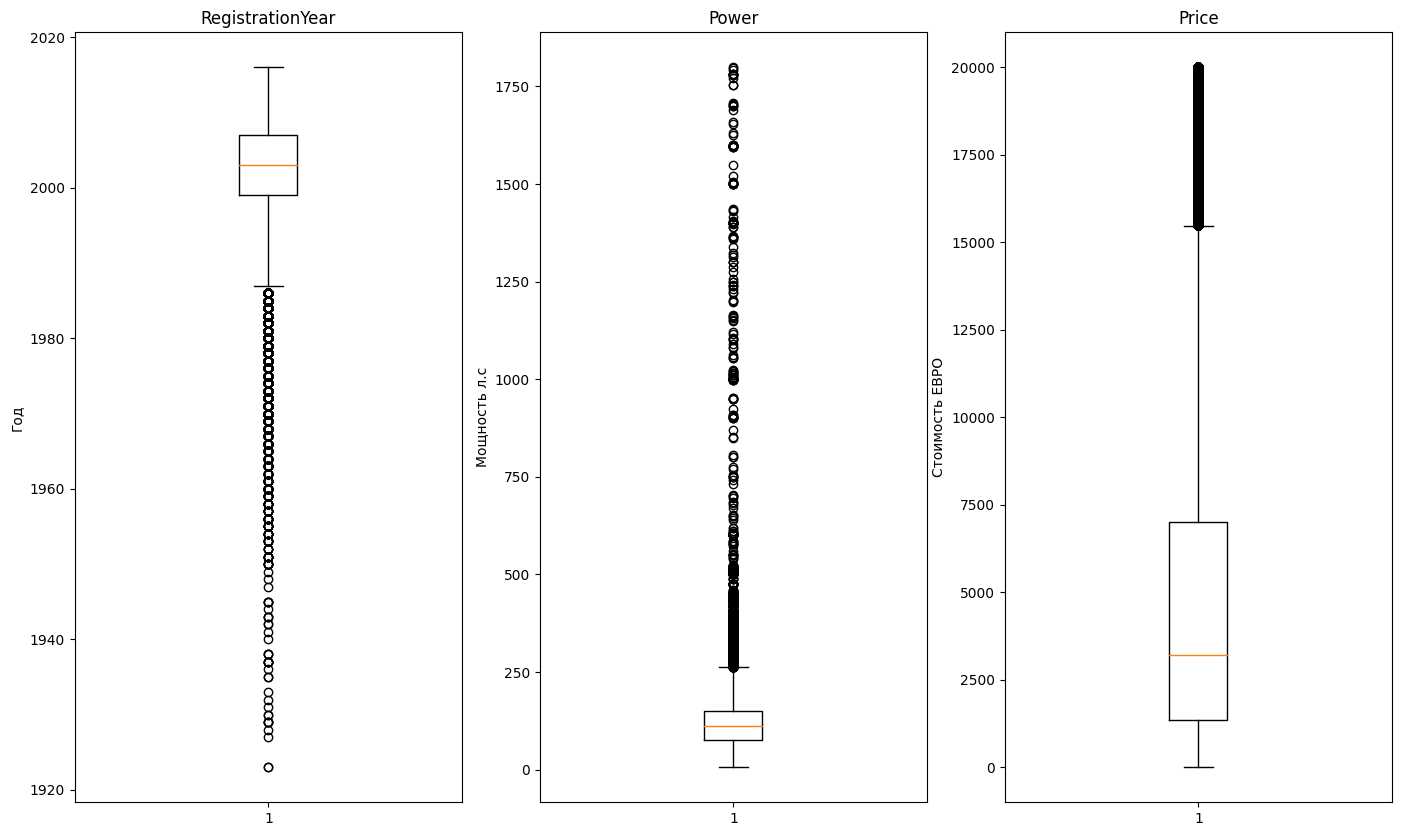

In [17]:
fig, axs = plt.subplots(1, 3, figsize=(17, 10))

axs[0].boxplot(df_clean['RegistrationYear'])
axs[0].set_title('RegistrationYear')
axs[0].set_ylabel('Год')
        
axs[1].boxplot(df_clean['Power'])
axs[1].set_title('Power')
axs[1].set_ylabel('Мощность л.с')

axs[2].boxplot(df_clean['Price'])
axs[2].set_title('Price')
axs[2].set_ylabel('Стоимость ЕВРО')

In [18]:
# Преобразуем на другой тип данных DateCrawled, DateCreated и LastSeen
df_clean['DateCrawled'] = pd.to_datetime(df_clean['DateCrawled'])
df_clean['DateCreated'] = pd.to_datetime(df_clean['DateCreated'])
df_clean['LastSeen'] = pd.to_datetime(df_clean['LastSeen'])

In [19]:
f'Потеряно {100 * (1 - df_clean.shape[0] / df.shape[0])}%'

'Потеряно 16.489026974707155%'

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'> Нужно оставить хотя бы 70 % данных.</font>

<font color='purple'><b>Комментарий студента</b> Потеря не велика. Теперь приступаем дальше</font>

#### Пропущенные значения

Устранили аномальные значения, теперь смотрим кол-во пропущенных значений. 

Будем устранять аномальные значения заполнением `"unknown"` или медиальным значением, т.к. радикальным методом не получится, т.к. будет большая потеря данных, что и приведет к `invalid` данным, т.к. данные должны сохранять 70% от исходного после переработки, смотрим.

In [20]:
df_clean.isna().sum()

DateCrawled              0
Price                    0
VehicleType          10926
RegistrationYear         0
Gearbox               5336
Power                    0
Model                11014
Kilometer                0
RegistrationMonth        0
FuelType             15455
Brand                    0
Repaired             42742
DateCreated              0
NumberOfPictures         0
PostalCode               0
LastSeen                 0
dtype: int64

In [21]:
len(df_clean)

295937

##### Радикальный метод

In [22]:
# Скорпируем
df_clean_rad = df_clean.copy()

In [23]:
# Устраняем
df_clean_rad = df_clean_rad[~df_clean_rad['VehicleType'].isna()]
df_clean_rad = df_clean_rad[~df_clean_rad['Gearbox'].isna()]
df_clean_rad = df_clean_rad[~df_clean_rad['Model'].isna()]
df_clean_rad = df_clean_rad[~df_clean_rad['FuelType'].isna()]
df_clean_rad = df_clean_rad[~df_clean_rad['Repaired'].isna()]

In [24]:
f'Потеряно {100 * (1 - df_clean_rad.shape[0] / df_clean.shape[0])}%'

'Потеряно 21.300817403704166%'

Потеря составляет 21% от датафрейма df_clean, но не стоит забывать, что датафрейм также претерпевал потерю около 17% от исходного датафрейма, значит, потеря составляет свыше 30%. А нам хотя бы сохранить не менее 70% от исходных данных

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'> Слишком большая потеря данных. Тесты будут невалидными.</font>

<font color='purple'><b>Комментарий студента</b> Подправил, исправил. Но у меня вопрос, 33% потеря, но не так сильно по сравнению предующего? Можно ли дальше провести исследование с этим датафреймом? </font>

##### Второй способ - заполнение `"unknown"` или медианным значением 

In [25]:
# Заполним значением "unknown"
df_clean['VehicleType'] = df_clean['VehicleType'].fillna('unknown')
df_clean['Gearbox'] = df_clean['Gearbox'].fillna('unknown')
df_clean['Model'] = df_clean['Model'].fillna('unknown')
df_clean['FuelType'] = df_clean['FuelType'].fillna('unknown')
df_clean['Repaired'] = df_clean['Repaired'].fillna('unknown')

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Пропуски заполнены достаточно безопасно.
</font>

In [26]:
# Проверим
df_clean.isna().sum()

DateCrawled          0
Price                0
VehicleType          0
RegistrationYear     0
Gearbox              0
Power                0
Model                0
Kilometer            0
RegistrationMonth    0
FuelType             0
Brand                0
Repaired             0
DateCreated          0
NumberOfPictures     0
PostalCode           0
LastSeen             0
dtype: int64

In [27]:
df_clean.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,unknown,125000,5,gasoline,audi,yes,2016-03-24,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,unknown,2016-03-14,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31,0,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,650,sedan,1995,manual,102,3er,150000,10,petrol,bmw,yes,2016-04-04,0,33775,2016-04-06 19:17:07


In [28]:
len(df_clean)

295937

#### Уникальные значения 

С столбцом `RegistrationMonth` что то неладное, смотрим

In [29]:
df_clean['RegistrationMonth'].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

Как оказывается, что существует одна лишняя цифра

In [30]:
df_clean['RegistrationMonth'].value_counts().sort_values()

0     17814
2     18856
8     19722
1     20187
9     20953
11    21050
12    21206
10    22962
7     23837
5     25619
4     25753
6     27556
3     30422
Name: RegistrationMonth, dtype: int64

Смотрим кол-во, чтобы понять, что с ними делать - удалить или усреднять

In [31]:
df_clean[df_clean['RegistrationMonth'] == 0]['RegistrationMonth'].count()

17814

In [32]:
df_clean[df_clean['RegistrationMonth'] == 12]['RegistrationMonth'].count()

21206

Кол-во приближенное одинаково, поэтому не можем устранять их, усредняем

In [33]:
df_clean.loc[df_clean['RegistrationMonth'] == 12]['RegistrationMonth'] = 6

C:\Users\Papin\AppData\Local\Temp\ipykernel_11700\2917873319.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.loc[df_clean['RegistrationMonth'] == 12]['RegistrationMonth'] = 6


In [34]:
df_clean['RegistrationMonth'].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

Теперь с данными в порядке, можно уже приступать к обучению моделей

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'>  Обрати внимание на уникальные значения в "registration_month"</font>

<font color='purple'><b>Комментарий студента</b> Подправил, исправил </font>

#### Дублирующие значения

In [35]:
# Кол-во дублириющие значения
df_clean.duplicated().sum()

4

In [36]:
# Избавимся от них
df_clean.drop_duplicates(inplace=True)

In [37]:
# Кол-во дублириющие значения
df_clean.duplicated().sum()

0

In [38]:
f'Потеряно {100 * (1 - df_clean.shape[0] / df.shape[0])}%'

'Потеряно 16.490155741613965%'

Теперь приступаем к обучению модели

## Обучение моделей

Перед обучением нужно сделать следующие: прямое кодирование, порядкое кодирование и масштабируемость модели. Поэтому обучение моделей будет разделен на 3 этапа: OH, OHE, SCALER. А также обучение будет проводиться кроссвалидацией

Поскольку у нас присутствуют некоторые признаки, которые являются строковыми или ojbect типами, а для машинного обучения регрессионного типа требует числа. Поэтому примением кодировку, которая будет преобразовать в числа

In [39]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 295933 entries, 1 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   DateCrawled        295933 non-null  datetime64[ns]
 1   Price              295933 non-null  int64         
 2   VehicleType        295933 non-null  object        
 3   RegistrationYear   295933 non-null  int64         
 4   Gearbox            295933 non-null  object        
 5   Power              295933 non-null  int64         
 6   Model              295933 non-null  object        
 7   Kilometer          295933 non-null  int64         
 8   RegistrationMonth  295933 non-null  int64         
 9   FuelType           295933 non-null  object        
 10  Brand              295933 non-null  object        
 11  Repaired           295933 non-null  object        
 12  DateCreated        295933 non-null  datetime64[ns]
 13  NumberOfPictures   295933 non-null  int64   

Как и видим, что существуют несколько признаков, имеющих типа object. Теперь создадим список, который автоматически заполняет определенный тип

In [40]:
# Здесь будем сохранить результаты машинного обучения
results = pd.DataFrame()

# А это будет счетчтиком для нумерация моеделй
count_model = 0

**Категориальные признаки**

In [41]:
col_type_obj = df_clean.select_dtypes(include='object').columns.to_list()
print('Список категориальных признаков:', col_type_obj)

Список категориальных признаков: ['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'Repaired']


**Численные признаки**

In [42]:
col_type_num = df_clean.select_dtypes(exclude='object').columns.to_list()
for i in ['DateCrawled', 'Price', 'DateCreated', 'NumberOfPictures', 'PostalCode', 'LastSeen']:
    col_type_num.remove(i)
print('Список численных признаков:', col_type_num)

Список численных признаков: ['RegistrationYear', 'Power', 'Kilometer', 'RegistrationMonth']


<font color='purple'><b>Комментарий студента</b> Позаимствовал идею с ссылки, что ты прислал. Удобная штука </font>

### Прямое кодирование - One-Hot Encoding

_**Памятка себе:**_

**Модели основанные на деревьях (все модели в проекте кроме Линейной) могут работать с порядковым кодированием категорий (OrdinalEncoding).**

**OHE сильно раздувает размерность данных, что сказывается на вычислительной нагрузке (времени).**

In [43]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 295933 entries, 1 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   DateCrawled        295933 non-null  datetime64[ns]
 1   Price              295933 non-null  int64         
 2   VehicleType        295933 non-null  object        
 3   RegistrationYear   295933 non-null  int64         
 4   Gearbox            295933 non-null  object        
 5   Power              295933 non-null  int64         
 6   Model              295933 non-null  object        
 7   Kilometer          295933 non-null  int64         
 8   RegistrationMonth  295933 non-null  int64         
 9   FuelType           295933 non-null  object        
 10  Brand              295933 non-null  object        
 11  Repaired           295933 non-null  object        
 12  DateCreated        295933 non-null  datetime64[ns]
 13  NumberOfPictures   295933 non-null  int64   

In [44]:
# Убираем лишние признаки перед прямым кодированием
df_ohe = df_clean[['Price', 'VehicleType', 'RegistrationYear', 'Gearbox', 'Power', 
                   'Model', 'Kilometer', 'RegistrationMonth', 'FuelType', 'Brand', 'Repaired']]

In [45]:
# Смотирм
df_ohe.duplicated().sum()

23102

In [46]:
# Избавимся от них
df_ohe.drop_duplicates(inplace=True)

C:\Users\Papin\AppData\Local\Temp\ipykernel_11700\2381614365.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ohe.drop_duplicates(inplace=True)


<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'> Здесь хорошо бы посмотреть дубликаты.</font>

<font color='purple'><b>Комментарий студента</b> Откуда они появились, я вроде же прочистил перед обучением</font>

#### Деление на обучающей и валидационной выборки

In [47]:
# Получаем признак и цель 
features = df_ohe.drop('Price', axis=1)
target = df_ohe['Price']

In [48]:
# Разделим обучающую и валидационную выборку
features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=(1 - 0.6), random_state=12345)

In [49]:
# Кодируем
encoder_ohe = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'>Хороший инструмент для быстрого анализа, но для новых данных если набор категорий будет отличаться, получить данные с такой-же размерностью будет нельзя. Для возможности работы модели с новыми данными нужен OneHotEncoder.</font>

<font color='purple'><b>Комментарий студента</b> Подправил </font>

In [50]:
# Обучаем энкодер на заданных категориальных признаках тренировочной выборки
encoder_ohe.fit(features_train[col_type_obj])

OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

In [51]:
# Добавляем закодированные признаки в X_train_ohe
# Encoder_ohe.get_feature_names_out() позволяет получить названия колонок
features_train[encoder_ohe.get_feature_names_out()] = encoder_ohe.transform(features_train[col_type_obj])

C:\Users\Papin\AppData\Local\Temp\ipykernel_11700\2474216900.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  features_train[encoder_ohe.get_feature_names_out()] = encoder_ohe.transform(features_train[col_type_obj])
C:\Users\Papin\AppData\Local\Temp\ipykernel_11700\2474216900.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  features_train[encoder_ohe.get_feature_names_out()] = encoder_ohe.transform(features_train[col_type_obj])
C:\Users\Papin\AppData\Local\Temp\ipykernel_11700\2474216900.py:3: PerformanceWarning: DataFrame

In [52]:
# Энкодером, который обучен на ТРЕНИРОВОЧНОЙ ВЫБОРКЕ, кодируем тестовую
features_valid[encoder_ohe.get_feature_names_out()] = encoder_ohe.transform(features_valid[col_type_obj])

D:\Program File\Anaconda\envs\practicum\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\Papin\AppData\Local\Temp\ipykernel_11700\2424170447.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  features_valid[encoder_ohe.get_feature_names_out()] = encoder_ohe.transform(features_valid[col_type_obj])
C:\Users\Papin\AppData\Local\Temp\ipykernel_11700\2424170447.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented f

In [53]:
# удаляем незакодированные категориальные признаки (изначальные колонки)
features_train = features_train.drop(col_type_obj, axis=1)

features_valid = features_valid.drop(col_type_obj, axis=1)

In [54]:
display(features_train.head())
display(features_valid.head())

,RegistrationYear,Power,Kilometer,RegistrationMonth,VehicleType_convertible,VehicleType_coupe,VehicleType_other,VehicleType_sedan,VehicleType_small,VehicleType_suv,...,Brand_smart,Brand_sonstige_autos,Brand_subaru,Brand_suzuki,Brand_toyota,Brand_trabant,Brand_volkswagen,Brand_volvo,Repaired_unknown,Repaired_yes
184019,2007,131,125000,6,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
224508,1997,75,100000,9,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
328264,1997,130,150000,3,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
136227,2009,143,60000,3,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
309930,2006,170,150000,12,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


,RegistrationYear,Power,Kilometer,RegistrationMonth,VehicleType_convertible,VehicleType_coupe,VehicleType_other,VehicleType_sedan,VehicleType_small,VehicleType_suv,...,Brand_smart,Brand_sonstige_autos,Brand_subaru,Brand_suzuki,Brand_toyota,Brand_trabant,Brand_volkswagen,Brand_volvo,Repaired_unknown,Repaired_yes
110198,2001,44,150000,5,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96619,2007,105,150000,3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
345457,2000,179,150000,0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
142762,1997,231,150000,3,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
221541,2008,71,50000,9,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Здорово , что у нас есть выборка для тестов!</font>

#### LinearRegression

In [55]:
# Устанавливаем нужные параметры
parameters = {}

# Инициализируем модель
model = GridSearchCV(LinearRegression(), param_grid = parameters, cv = 2, scoring = 'neg_root_mean_squared_error')

In [56]:
%%notify -m "LinearRegression OHE"
%%time

# Обучим модель на тренировочной выборке
model.fit(features_train, target_train)

# Узнаем RMSE
result_RMSE = -model.best_score_
print('RMSE:', result_RMSE)

RMSE: 2679.788798644243
CPU times: total: 8.28 s
Wall time: 7.59 s


<IPython.core.display.Javascript object>

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Кодирование признков соответсвует модели!</font>

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Классно , что применена кроссвалидация!</font>

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'> Время обучения модели нужно измерить без подбора гиперпараметров и кроссвалидации. Сетка параметров у моделей разная и сравнивать время их перебора некорректно.</font>

<font color='blue'><b>Комментарий ревьюера : </b></font>\
<font color='blue'>Время обучения модели с лучшими параметрами на всех данных (в конце подбора) можно вытащить как  `model.refit_time_`</font>

**Проверка на тестовой выборки**

In [57]:
%%time
start_time = timeit.default_timer()
# Получим предсказания на тестовой выборки
predictions = model.predict(features_valid)

elapsed = round(timeit.default_timer() - start_time, 3)

print('Предсказание:', predictions.mean())

Предсказание: 4844.076333852994
CPU times: total: 234 ms
Wall time: 263 ms


In [58]:
# Зафиксируем результаты
results[count_model] = pd.Series({'NAME': 'LinearRegression_OHE', 'RMSE': result_RMSE, 'PREDICTIONS': predictions.mean(), 'TIME TRAINING [s]': model.refit_time_, 'TIME PREDICTION [s]': elapsed})
results[count_model]
count_model+=1

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Подбор гиперпараметров проведён верно!</font>

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'> Модели основанные на деревьях (все модели в проекте кроме Линейной) могут работать с порядковым кодированием категорий (OrdinalEncoding). OHE сильно раздувает размерность данных, что сказывается на вычислительной нагрузке (времени).</font>

<font color='purple'><b>Комментарий студента</b> Понял, принял. Уберу их </font>

#### LightGBMRegressor

In [59]:
# Матрица гиперпараметров для LightGBMRegressor
parameters = {'num_leaves': [5, 10],
              'learning_rate': [0.1, 0.3],
              'max_depth': [3, 5],
              'n_estimators': [10, 25]}

# Инициализируем модель c параметрами
model = GridSearchCV(LGBMRegressor(), parameters, cv = 5, scoring = 'neg_root_mean_squared_error')

In [60]:
%%notify -m "LightGBMRegressor OHE"

# Обучим модель на тренировочной выборке
model.fit(features_train, target_train)

# Узнаем RMSE
result_RMSE = -model.best_score_
print('RMSE:', result_RMSE)

RMSE: 1849.0711922591963


<IPython.core.display.Javascript object>

**Проверка на тестовой выборки**

In [61]:
%%time
start_time = timeit.default_timer()
# Получим предсказания на тестовой выборки
predictions = model.predict(features_valid)

elapsed = round(timeit.default_timer() - start_time, 3)

print('Предсказание:', predictions.mean())

Предсказание: 4851.010621932866
CPU times: total: 1.55 s
Wall time: 335 ms


In [62]:
# Зафиксируем результаты
results[count_model] = pd.Series({'NAME': 'LGBMRegressor_OHE', 'RMSE': result_RMSE, 'PREDICTIONS': predictions.mean(), 'TIME TRAINING [s]': model.refit_time_, 'TIME PREDICTION [s]': elapsed})
results[count_model]
count_model+=1

#### CatBoostRegressor

In [63]:
# Матрица гиперпараметров для LightGBMRegressor
parameters = {'depth' : [6, 8, 10],
              'learning_rate' : [0.01, 0.05, 0.1],
              'iterations' : [10, 15, 20]}

# Инициализируем модель c параметрами
model = GridSearchCV(CatBoostRegressor(), parameters, cv = 5, scoring = 'neg_root_mean_squared_error')

In [64]:
%%notify -m "CatBoostRegressor OHE"
%%time

# Обучим модель на тренировочной выборке
model.fit(features_train, target_train)

# Узнаем RMSE
result_RMSE = -model.best_score_
print('RMSE:', result_RMSE)

0:	learn: 4575.0001771	total: 154ms	remaining: 1.39s
1:	learn: 4545.4280282	total: 166ms	remaining: 665ms
2:	learn: 4516.0329446	total: 178ms	remaining: 415ms
3:	learn: 4486.7006513	total: 189ms	remaining: 284ms
4:	learn: 4457.5297860	total: 201ms	remaining: 201ms
5:	learn: 4428.9308340	total: 213ms	remaining: 142ms
6:	learn: 4400.4550453	total: 224ms	remaining: 96ms
7:	learn: 4372.6748407	total: 235ms	remaining: 58.7ms
8:	learn: 4345.0370790	total: 246ms	remaining: 27.3ms
9:	learn: 4317.1256548	total: 256ms	remaining: 0us
0:	learn: 4580.0539596	total: 11.3ms	remaining: 102ms
1:	learn: 4549.8118902	total: 22.7ms	remaining: 90.7ms
2:	learn: 4520.5525846	total: 33.7ms	remaining: 78.7ms
3:	learn: 4491.4928046	total: 44.4ms	remaining: 66.6ms
4:	learn: 4462.2034416	total: 56.3ms	remaining: 56.3ms
5:	learn: 4433.7531263	total: 68.2ms	remaining: 45.5ms
6:	learn: 4405.6034267	total: 80ms	remaining: 34.3ms
7:	learn: 4377.7373641	total: 92.4ms	remaining: 23.1ms
8:	learn: 4349.9311699	total: 103m

<IPython.core.display.Javascript object>

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'>CatBoost может сам кодировать категории из типа данных 'object' и 'category', но эта кодровка занимает дополнительное время. Если кодировать OE, то получатся быстрее.</font>

<font color='purple'><b>Комментарий студента</b> Понял, учту в будущем </font>

**Проверка на тестовой выборки**

In [65]:
%%time
start_time = timeit.default_timer()
# Получим предсказания на тестовой выборки
predictions = model.predict(features_valid)

elapsed = round(timeit.default_timer() - start_time, 3)

print('Предсказание:', predictions.mean())

Предсказание: 4845.692336183425
CPU times: total: 0 ns
Wall time: 30 ms


In [66]:
# Зафиксируем результаты
results[count_model] = pd.Series({'NAME': 'CatBoostRegressor_OHE', 'RMSE': result_RMSE, 'PREDICTIONS': predictions.mean(), 'TIME TRAINING [s]': model.refit_time_, 'TIME PREDICTION [s]': elapsed})
results[count_model]
count_model+=1

### Порядковое кодирование - OrdinalEncoder

#### Кодирование признаков - деление на обучающей и валидационной выборки

Теперь преобразуем в другой тип, применяя OrdinalEncoder

In [67]:
features = df_clean.drop(['Price'], axis=1)
target = df_clean['Price']

In [68]:
# Разделим обучающую и валидационную выборку
features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=(1 - 0.6), random_state=12345)

In [69]:
# Обучающие признаки
features_train = pd.DataFrame(OrdinalEncoder().fit_transform(features_train[col_type_obj]), columns=col_type_obj)
# Валидационные признаки
features_valid = pd.DataFrame(OrdinalEncoder().fit_transform(features_valid[col_type_obj]), columns=col_type_obj)

In [70]:
# Проверим
print(features_train.shape)
print(features_valid.shape)

(177559, 6)
(118374, 6)


In [71]:
print('Размер обучающей выборки:', round(features_train.shape[0] / features.shape[0], 2), '%')
print('Размер валидационной выборки:', round(features_valid.shape[0] / target.shape[0], 2), '%')

Размер обучающей выборки: 0.6 %
Размер валидационной выборки: 0.4 %


In [72]:
features_train.head()

,VehicleType,Gearbox,Model,FuelType,Brand,Repaired
0,5.0,1.0,75.0,7.0,27.0,0.0
1,4.0,1.0,116.0,6.0,38.0,0.0
2,8.0,1.0,136.0,6.0,27.0,0.0
3,0.0,1.0,166.0,2.0,19.0,0.0
4,4.0,1.0,15.0,6.0,2.0,0.0


<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'> Энкодер (как и Скалер) нельзя обучать на полных данных.\
Для вычисления трансформаций они используют информацию о всех поданных в них данных и обучение на полных данных приводит к утечке из обучающей выборки во все остальные. Тестовые и валидационные выборки можно только трансформировать, предобработчиками обученными на train.</font>

<font color='purple'><b>Комментарий студента</b> Подправил. Но разве для обучения нужны еще другие признаки, чтобы повысить эффективность (находить закономерность и связи), а тут получается, что мы убрали их и оставили лишь шесть признаков </font>

Теперь создадим датасет, в котором содержатся исключительно цифры

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'> Линейные модели требуют OHE кодировки категорий.</font>

<font color='purple'><b>Комментарий студента</b> Убрал, т.к. предыдующая ошибка учла </font>

**Проверка на тестовой выборки**

#### DecisionTreeRegressor

In [73]:
# Матрица гиперпараметров
parameters = {'max_depth': range(1, 6, 16), 'min_samples_leaf': [1, 0.5, 2]}

# Инициализируем модель c параметрами
model = GridSearchCV(DecisionTreeRegressor(random_state = 12345), param_grid = parameters, cv = 5, scoring = 'neg_root_mean_squared_error')

In [74]:
%%notify -m "DecisionTreeRegressor OE"

# Обучим модель на тренировочной выборке
model.fit(features_train, target_train)

# Узнаем RMSE
result_RMSE = -model.best_score_
print('RMSE:', result_RMSE)

elapsed = round(timeit.default_timer() - start_time, 3)

RMSE: 4415.415515654763


<IPython.core.display.Javascript object>

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Кодирование признков соответсвует модели!</font>

**Проверка на тестовой выборки**

In [75]:
%%time
start_time = timeit.default_timer()
# Получим предсказания на тестовой выборки
predictions = model.predict(features_valid)

elapsed = round(timeit.default_timer() - start_time, 3)

print('Предсказание:', predictions.mean())

Предсказание: 4878.0599782277695
CPU times: total: 0 ns
Wall time: 6.01 ms


In [76]:
# Зафиксируем результаты
results[count_model] = pd.Series({'NAME': 'DecisionTreeRegressor_OE', 'RMSE': result_RMSE, 'PREDICTIONS': predictions.mean(), 'TIME TRAINING [s]': model.refit_time_, 'TIME PREDICTION [s]': elapsed})
results[count_model]
count_model+=1

#### RandomForestRegressor

In [77]:
# Матрица гиперпараметров для случайного леса
parameters = {'bootstrap': [True], 'max_depth': [5, 15], 'max_features': ['auto', 'log2'], 'n_estimators': [25, 50]}

# Инициализируем модель c параметрами
model = GridSearchCV(RandomForestRegressor(random_state = 12345), parameters, cv = 5, scoring = 'neg_root_mean_squared_error')

In [78]:
%%notify -m "RandomForestRegressor OE"
%%time

# Обучим модель на тренировочной выборке
model.fit(features_train, target_train)

# Узнаем RMSE
result_RMSE = -model.best_score_
print('RMSE:', result_RMSE)

D:\Program File\Anaconda\envs\practicum\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Program File\Anaconda\envs\practicum\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Program File\Anaconda\envs\practicum\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

RMSE: 3481.48289257011
CPU times: total: 1min 40s
Wall time: 1min 43s


<IPython.core.display.Javascript object>

**Проверка на тестовой выборки**

In [79]:
%%time
start_time = timeit.default_timer()
# Получим предсказания на тестовой выборки
predictions = model.predict(features_valid)

elapsed = round(timeit.default_timer() - start_time, 3)

print('Предсказание:', predictions.mean())

Предсказание: 4917.8850479183075
CPU times: total: 734 ms
Wall time: 761 ms


In [80]:
# Зафиксируем результаты
results[count_model] = pd.Series({'NAME': 'RandomForestRegressor_OE', 'RMSE': result_RMSE, 'PREDICTIONS': predictions.mean(), 'TIME TRAINING [s]': model.refit_time_, 'TIME PREDICTION [s]': elapsed})
results[count_model]
count_model+=1

#### LightGBMRegressor

In [81]:
# Матрица гиперпараметров для LightGBMRegressor
parameters = {'num_leaves': [5, 10],
              'learning_rate': [0.1, 0.3],
              'max_depth': [3, 5],
              'n_estimators': [10, 25]}

# Инициализируем модель c параметрами
model = GridSearchCV(LGBMRegressor(), parameters, cv = 5, scoring = 'neg_root_mean_squared_error')

In [82]:
%%notify -m "LightGBMRegressor OE"
%%time

# Обучим модель на тренировочной выборке
model.fit(features_train, target_train)

# Узнаем RMSE
result_RMSE = -model.best_score_
print('RMSE:', result_RMSE)

RMSE: 3716.0189293083263
CPU times: total: 1min 54s
Wall time: 8.09 s


<IPython.core.display.Javascript object>

**Проверка на тестовой выборки**

In [83]:
%%time
start_time = timeit.default_timer()
# Получим предсказания на тестовой выборки
predictions = model.predict(features_valid)

elapsed = round(timeit.default_timer() - start_time, 3)

print('Предсказание:', predictions.mean())

Предсказание: 4922.192052051379
CPU times: total: 438 ms
Wall time: 30 ms


In [84]:
# Зафиксируем результаты
results[count_model] = pd.Series({'NAME': 'LGBMRegressor_OE', 'RMSE': result_RMSE, 'PREDICTIONS': predictions.mean(), 'TIME TRAINING [s]': model.refit_time_, 'TIME PREDICTION [s]': elapsed})
results[count_model]
count_model+=1

#### CatBoostRegressor

In [85]:
# Матрица гиперпараметров для LightGBMRegressor
parameters = {'depth' : [6, 8, 10],
              'learning_rate' : [0.01, 0.05, 0.1],
              'iterations' : [10, 15, 20]}

# Инициализируем модель c параметрами
model = GridSearchCV(CatBoostRegressor(), parameters, cv = 5, scoring = 'neg_root_mean_squared_error')

In [86]:
%%notify -m "CatBoostRegressor OE"
%%time

# Обучим модель на тренировочной выборке
model.fit(features_train, target_train)

# Узнаем RMSE
result_RMSE = -model.best_score_
print('RMSE:', result_RMSE)

0:	learn: 4614.9702257	total: 9.94ms	remaining: 89.5ms
1:	learn: 4603.9181521	total: 21.2ms	remaining: 84.8ms
2:	learn: 4592.9956013	total: 30ms	remaining: 70ms
3:	learn: 4582.2639861	total: 39.6ms	remaining: 59.4ms
4:	learn: 4571.7627772	total: 49.8ms	remaining: 49.8ms
5:	learn: 4561.4881886	total: 60.9ms	remaining: 40.6ms
6:	learn: 4551.3920948	total: 71ms	remaining: 30.4ms
7:	learn: 4541.3837436	total: 80.9ms	remaining: 20.2ms
8:	learn: 4531.6809957	total: 90.5ms	remaining: 10.1ms
9:	learn: 4521.9277066	total: 101ms	remaining: 0us
0:	learn: 4606.1325331	total: 9.98ms	remaining: 89.8ms
1:	learn: 4595.0166923	total: 19.6ms	remaining: 78.6ms
2:	learn: 4584.1094943	total: 29.5ms	remaining: 68.9ms
3:	learn: 4573.4092189	total: 38.5ms	remaining: 57.8ms
4:	learn: 4562.9411944	total: 47.1ms	remaining: 47.1ms
5:	learn: 4552.7182571	total: 55.5ms	remaining: 37ms
6:	learn: 4542.6476872	total: 65.3ms	remaining: 28ms
7:	learn: 4532.6652104	total: 73.9ms	remaining: 18.5ms
8:	learn: 4522.9885759	t

<IPython.core.display.Javascript object>

**Проверка на тестовой выборки**

In [87]:
%%time
start_time = timeit.default_timer()
# Получим предсказания на тестовой выборки
predictions = model.predict(features_valid)

elapsed = round(timeit.default_timer() - start_time, 3)

print('Предсказание:', predictions.mean())

Предсказание: 4879.587539186583
CPU times: total: 0 ns
Wall time: 25.1 ms


In [88]:
# Зафиксируем результаты
results[count_model] = pd.Series({'NAME': 'CatBoostRegressor_OE', 'RMSE': result_RMSE, 'PREDICTIONS': predictions.mean(), 'TIME TRAINING [s]': model.refit_time_, 'TIME PREDICTION [s]': elapsed})
results[count_model]
count_model+=1

### Масштабирование признаков - StandardScaler

#### Масштабируем OHE

##### Деление на обучающей и валидационной выборки

In [89]:
features = df_ohe.drop(['Price'], axis=1)
target = df_ohe['Price']

In [90]:
# Разделим обучающую и валидационную выборку
features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=(1 - 0.6), random_state=12345)

In [91]:
# Кодируем
encoder_ohe = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

<font color='purple'><b>Комментарий студента</b> Подправил </font>

In [92]:
# Обучаем энкодер на заданных категориальных признаках тренировочной выборки
encoder_ohe.fit(features_train[col_type_obj])

OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

In [93]:
# Добавляем закодированные признаки в X_train_ohe
# Encoder_ohe.get_feature_names_out() позволяет получить названия колонок
features_train[encoder_ohe.get_feature_names_out()] = encoder_ohe.transform(features_train[col_type_obj])

C:\Users\Papin\AppData\Local\Temp\ipykernel_11700\2474216900.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  features_train[encoder_ohe.get_feature_names_out()] = encoder_ohe.transform(features_train[col_type_obj])
C:\Users\Papin\AppData\Local\Temp\ipykernel_11700\2474216900.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  features_train[encoder_ohe.get_feature_names_out()] = encoder_ohe.transform(features_train[col_type_obj])
C:\Users\Papin\AppData\Local\Temp\ipykernel_11700\2474216900.py:3: PerformanceWarning: DataFrame

In [94]:
# Энкодером, который обучен на ТРЕНИРОВОЧНОЙ ВЫБОРКЕ, кодируем тестовую
features_valid[encoder_ohe.get_feature_names_out()] = encoder_ohe.transform(features_valid[col_type_obj])

D:\Program File\Anaconda\envs\practicum\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\Papin\AppData\Local\Temp\ipykernel_11700\2424170447.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  features_valid[encoder_ohe.get_feature_names_out()] = encoder_ohe.transform(features_valid[col_type_obj])
C:\Users\Papin\AppData\Local\Temp\ipykernel_11700\2424170447.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented f

In [95]:
# удаляем незакодированные категориальные признаки (изначальные колонки)
features_train = features_train.drop(col_type_obj, axis=1)

features_valid = features_valid.drop(col_type_obj, axis=1)

In [96]:
display(features_train.head())
display(features_valid.head())

,RegistrationYear,Power,Kilometer,RegistrationMonth,VehicleType_convertible,VehicleType_coupe,VehicleType_other,VehicleType_sedan,VehicleType_small,VehicleType_suv,...,Brand_smart,Brand_sonstige_autos,Brand_subaru,Brand_suzuki,Brand_toyota,Brand_trabant,Brand_volkswagen,Brand_volvo,Repaired_unknown,Repaired_yes
184019,2007,131,125000,6,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
224508,1997,75,100000,9,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
328264,1997,130,150000,3,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
136227,2009,143,60000,3,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
309930,2006,170,150000,12,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


,RegistrationYear,Power,Kilometer,RegistrationMonth,VehicleType_convertible,VehicleType_coupe,VehicleType_other,VehicleType_sedan,VehicleType_small,VehicleType_suv,...,Brand_smart,Brand_sonstige_autos,Brand_subaru,Brand_suzuki,Brand_toyota,Brand_trabant,Brand_volkswagen,Brand_volvo,Repaired_unknown,Repaired_yes
110198,2001,44,150000,5,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96619,2007,105,150000,3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
345457,2000,179,150000,0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
142762,1997,231,150000,3,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
221541,2008,71,50000,9,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [97]:
# Масштабируем признаки: обучающую и валидационную выборку
scaler = StandardScaler()

In [98]:
# Преобразуем обучающую, валидационную и тестовую выборки функцией transform(), т.е.
# обучаем его на численных признаках тренировочной выборки, трансформируем её же
features_train[col_type_num] = scaler.fit_transform(features_train[col_type_num])
features_valid[col_type_num] = scaler.fit_transform(features_valid[col_type_num])

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Отлично, что scaler был обучен только на тренировочной части данных!</font>

In [99]:
# Проверим
print(features_train.shape)
print(features_valid.shape)

(163698, 310)
(109133, 310)


In [100]:
print('Размер обучающей выборки:', round(features_train.shape[0] / features.shape[0], 2), '%')
print('Размер валидационной выборки:', round(features_valid.shape[0] / target.shape[0], 2), '%')

Размер обучающей выборки: 0.6 %
Размер валидационной выборки: 0.4 %


In [101]:
features_train.head()

,RegistrationYear,Power,Kilometer,RegistrationMonth,VehicleType_convertible,VehicleType_coupe,VehicleType_other,VehicleType_sedan,VehicleType_small,VehicleType_suv,...,Brand_smart,Brand_sonstige_autos,Brand_subaru,Brand_suzuki,Brand_toyota,Brand_trabant,Brand_volkswagen,Brand_volvo,Repaired_unknown,Repaired_yes
184019,0.639959,0.160845,-0.090133,0.005881,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
224508,-0.882114,-0.762130,-0.770483,0.840874,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
328264,-0.882114,0.144363,0.590217,-0.829112,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
136227,0.944374,0.358625,-1.859043,-0.829112,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
309930,0.487752,0.803631,0.590217,1.675868,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [102]:
features_valid.head()

,RegistrationYear,Power,Kilometer,RegistrationMonth,VehicleType_convertible,VehicleType_coupe,VehicleType_other,VehicleType_sedan,VehicleType_small,VehicleType_suv,...,Brand_smart,Brand_sonstige_autos,Brand_subaru,Brand_suzuki,Brand_toyota,Brand_trabant,Brand_volkswagen,Brand_volvo,Repaired_unknown,Repaired_yes
110198,-0.265106,-1.244210,0.591269,-0.269498,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96619,0.639549,-0.261018,0.591269,-0.827991,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
345457,-0.415881,0.931706,0.591269,-1.665730,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
142762,-0.868209,1.769837,0.591269,-0.827991,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
221541,0.790325,-0.809027,-2.121061,0.847488,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### LinearRegression

In [103]:
# Устанавливаем нужные параметры
parameters = {}

# Инициализируем модель
model = GridSearchCV(LinearRegression(), param_grid = parameters, cv = 5, scoring = 'neg_root_mean_squared_error')

In [104]:
%%notify -m "LinearRegression OHE C"
%%time

# Обучим модель на тренировочной выборке
model.fit(features_train, target_train)

# Узнаем RMSE
result_RMSE = -model.best_score_
print('RMSE:', result_RMSE)

RMSE: 2678.2658313390552
CPU times: total: 22.9 s
Wall time: 19.5 s


<IPython.core.display.Javascript object>

**Проверка на тестовой выборки**

In [105]:
%%time
start_time = timeit.default_timer()
# Получим предсказания на тестовой выборки
predictions = model.predict(features_valid)

elapsed = round(timeit.default_timer() - start_time, 3)

print('Предсказание:', predictions.mean())

Предсказание: 4850.247989100264
CPU times: total: 188 ms
Wall time: 171 ms


In [106]:
# Зафиксируем результаты
results[count_model] = pd.Series({'NAME': 'LinearRegression_OHE_C', 'RMSE': result_RMSE, 'PREDICTIONS': predictions.mean(), 'TIME TRAINING [s]': model.refit_time_, 'TIME PREDICTION [s]': elapsed})
results[count_model]
count_model+=1

##### LightGBMRegressor

In [107]:
# Матрица гиперпараметров для LightGBMRegressor
parameters = {'num_leaves': [5, 10],
              'learning_rate': [0.1, 0.3],
              'max_depth': [3, 5],
              'n_estimators': [10, 25]}

# Инициализируем модель c параметрами
model = GridSearchCV(LGBMRegressor(), parameters, cv = 5, scoring = 'neg_root_mean_squared_error')

In [108]:
%%notify -m "LightGBMRegressor OHE C"
%%time

# Обучим модель на тренировочной выборке
model.fit(features_train, target_train)

# Узнаем RMSE
result_RMSE = -model.best_score_
print('RMSE:', result_RMSE)

RMSE: 1851.031609506405
CPU times: total: 6min 25s
Wall time: 52.1 s


<IPython.core.display.Javascript object>

**Проверка на тестовой выборки**

In [109]:
%%time
start_time = timeit.default_timer()
# Получим предсказания на тестовой выборки
predictions = model.predict(features_valid)

elapsed = round(timeit.default_timer() - start_time, 3)

print('Предсказание:', predictions.mean())

Предсказание: 4831.796859293353
CPU times: total: 1.77 s
Wall time: 210 ms


In [110]:
# Зафиксируем результаты
results[count_model] = pd.Series({'NAME': 'LGBMRegressor_OHE_C', 'RMSE': result_RMSE, 'PREDICTIONS': predictions.mean(), 'TIME TRAINING [s]': model.refit_time_, 'TIME PREDICTION [s]': elapsed})
results[count_model]
count_model+=1

##### CatBoostRegressor

In [111]:
# Матрица гиперпараметров для LightGBMRegressor
parameters = {'depth' : [6, 8, 10],
              'learning_rate' : [0.01, 0.05, 0.1],
              'iterations' : [10, 15, 20]}

# Инициализируем модель c параметрами
model = GridSearchCV(CatBoostRegressor(), parameters, cv = 5, scoring = 'neg_root_mean_squared_error')

In [112]:
%%notify -m "CatBoostRegressor OHE C"
%%time

# Обучим модель на тренировочной выборке
model.fit(features_train, target_train)

# Узнаем RMSE
result_RMSE = -model.best_score_
print('RMSE:', result_RMSE)

0:	learn: 4575.0001771	total: 13.8ms	remaining: 124ms
1:	learn: 4545.4280282	total: 24.8ms	remaining: 99.2ms
2:	learn: 4516.0329446	total: 35.3ms	remaining: 82.3ms
3:	learn: 4486.7006513	total: 47.1ms	remaining: 70.6ms
4:	learn: 4457.5297860	total: 57.6ms	remaining: 57.6ms
5:	learn: 4428.9308340	total: 67.3ms	remaining: 44.9ms
6:	learn: 4400.4550453	total: 77.5ms	remaining: 33.2ms
7:	learn: 4372.6748407	total: 87.1ms	remaining: 21.8ms
8:	learn: 4345.0370790	total: 96.8ms	remaining: 10.8ms
9:	learn: 4317.1256548	total: 106ms	remaining: 0us
0:	learn: 4580.0539596	total: 11.5ms	remaining: 104ms
1:	learn: 4549.8118902	total: 21.5ms	remaining: 86.1ms
2:	learn: 4520.5525846	total: 31.2ms	remaining: 72.7ms
3:	learn: 4491.4928046	total: 41.5ms	remaining: 62.2ms
4:	learn: 4462.2034416	total: 51.7ms	remaining: 51.7ms
5:	learn: 4433.7531263	total: 62ms	remaining: 41.3ms
6:	learn: 4405.6034267	total: 72.3ms	remaining: 31ms
7:	learn: 4377.7373641	total: 82.2ms	remaining: 20.6ms
8:	learn: 4349.93116

<IPython.core.display.Javascript object>

**Проверка на тестовой выборки**

In [113]:
%%time
start_time = timeit.default_timer()
# Получим предсказания на тестовой выборки
predictions = model.predict(features_valid)

elapsed = round(timeit.default_timer() - start_time, 3)

print('Предсказание:', predictions.mean())

Предсказание: 4840.696759192059
CPU times: total: 15.6 ms
Wall time: 28.5 ms


In [114]:
# Зафиксируем результаты
results[count_model] = pd.Series({'NAME': 'CatBoostRegressor_OHE_C', 'RMSE': result_RMSE, 'PREDICTIONS': predictions.mean(), 'TIME TRAINING [s]': model.refit_time_, 'TIME PREDICTION [s]': elapsed})
results[count_model]
count_model+=1

<font color='purple'><b>Комментарий студента</b> Масштабирование признаков было немного изменено, а именно с кодированием OHE </font>

#### Масштабируем OE

##### Деление на обучающей и валидационной выборки

In [115]:
features = df_clean.drop(['Price'], axis=1)
target = df_clean['Price']

In [116]:
# Разделим обучающую и валидационную выборку
features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=(1 - 0.6), random_state=12345)

##### Кодируем признаки

In [117]:
# Обучающие признаки
features_train = pd.DataFrame(OrdinalEncoder().fit_transform(features_train[col_type_obj]), columns=col_type_obj)
# Валидационные признаки
features_valid = pd.DataFrame(OrdinalEncoder().fit_transform(features_valid[col_type_obj]), columns=col_type_obj)

In [118]:
# Масштабируем признаки: обучающую и валидационную выборку
scaler.fit(features_train[col_type_obj])

# Преобразуем обучающую, валидационную и тестовую выборки функцией transform()
features_train[col_type_obj] = scaler.transform(features_train[col_type_obj])
features_valid[col_type_obj] = scaler.transform(features_valid[col_type_obj])

In [119]:
# Проверим
print(features_train.shape)
print(features_valid.shape)

(177559, 6)
(118374, 6)


In [120]:
print('Размер обучающей выборки:', round(features_train.shape[0] / features.shape[0], 2), '%')
print('Размер валидационной выборки:', round(features_valid.shape[0] / target.shape[0], 2), '%')

Размер обучающей выборки: 0.6 %
Размер валидационной выборки: 0.4 %


In [121]:
features_train.head()

,VehicleType,Gearbox,Model,FuelType,Brand,Repaired
0,0.178426,0.422522,-0.513284,1.157953,0.468488,-0.523308
1,-0.237768,0.422522,0.049325,0.626473,1.291481,-0.523308
2,1.427006,0.422522,0.323768,0.626473,0.468488,-0.523308
3,-1.902541,0.422522,0.735432,-1.499444,-0.130053,-0.523308
4,-0.237768,0.422522,-1.336613,0.626473,-1.401951,-0.523308


##### DecisionTreeRegressor

In [122]:
# Матрица гиперпараметров
parameters = {'max_depth': range(1, 6, 16), 'min_samples_leaf': [1, 0.5, 2]}

# Инициализируем модель c параметрами
model = GridSearchCV(DecisionTreeRegressor(random_state = 12345), param_grid = parameters, cv = 5, scoring = 'neg_root_mean_squared_error')

In [123]:
%%notify -m "DecisionTreeRegressor OE C"
%%time

# Обучим модель на тренировочной выборке
model.fit(features_train, target_train)

# Узнаем RMSE
result_RMSE = -model.best_score_
print('RMSE:', result_RMSE)

RMSE: 4415.415515654763
CPU times: total: 344 ms
Wall time: 359 ms


<IPython.core.display.Javascript object>

**Проверка на тестовой выборки**

In [124]:
%%time
start_time = timeit.default_timer()
# Получим предсказания на тестовой выборки
predictions = model.predict(features_valid)

elapsed = round(timeit.default_timer() - start_time, 3)

print('Предсказание:', predictions.mean())

Предсказание: 4878.0599782277695
CPU times: total: 0 ns
Wall time: 10 ms


In [125]:
# Зафиксируем результаты
results[count_model] = pd.Series({'NAME': 'DecisionTreeRegressor_OE_C','RMSE': result_RMSE, 'PREDICTIONS': predictions.mean(), 'TIME TRAINING [s]': model.refit_time_, 'TIME PREDICTION [s]': elapsed})
results[count_model]
count_model+=1

##### RandomForestRegressor

In [126]:
# Матрица гиперпараметров для случайного леса
parameters = {'bootstrap': [True], 'max_depth': [5, 15], 'max_features': ['auto', 'log2'], 'n_estimators': [25, 50]}

# Инициализируем модель c параметрами
model = GridSearchCV(RandomForestRegressor(random_state = 12345), parameters, cv = 5, scoring = 'neg_root_mean_squared_error')

In [127]:
%%notify -m "RandomForestRegressor OE C"
%%time

# Обучим модель на тренировочной выборке
model.fit(features_train, target_train)

# Узнаем RMSE
result_RMSE = -model.best_score_
print('RMSE:', result_RMSE)

D:\Program File\Anaconda\envs\practicum\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Program File\Anaconda\envs\practicum\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Program File\Anaconda\envs\practicum\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

RMSE: 3481.2866744037797
CPU times: total: 1min 29s
Wall time: 1min 30s


<IPython.core.display.Javascript object>

**Проверка на тестовой выборки**

In [128]:
%%time
start_time = timeit.default_timer()
# Получим предсказания на тестовой выборки
predictions = model.predict(features_valid)

elapsed = round(timeit.default_timer() - start_time, 3)

print('Предсказание:', predictions.mean())

Предсказание: 4919.919441286017
CPU times: total: 719 ms
Wall time: 721 ms


In [129]:
# Зафиксируем результаты
results[count_model] = pd.Series({'NAME': 'RandomForestRegressor_OE_C', 'RMSE': result_RMSE, 'PREDICTIONS': predictions.mean(), 'TIME TRAINING [s]': model.refit_time_, 'TIME PREDICTION [s]': elapsed})
results[count_model]
count_model+=1

##### LightGBMRegressor

In [130]:
# Матрица гиперпараметров для LightGBMRegressor
parameters = {'num_leaves': [5, 10],
              'learning_rate': [0.1, 0.3],
              'max_depth': [3, 5],
              'n_estimators': [10, 25]}

# Инициализируем модель c параметрами
model = GridSearchCV(LGBMRegressor(), parameters, cv = 5, scoring = 'neg_root_mean_squared_error')

In [131]:
%%notify -m "LightGBMRegressor OE C"
%%time

# Обучим модель на тренировочной выборке
model.fit(features_train, target_train)

# Узнаем RMSE
result_RMSE = -model.best_score_
print('RMSE:', result_RMSE)

RMSE: 3716.0189293083263
CPU times: total: 1min 50s
Wall time: 7.56 s


<IPython.core.display.Javascript object>

**Проверка на тестовой выборки**

In [132]:
%%time
start_time = timeit.default_timer()
# Получим предсказания на тестовой выборки
predictions = model.predict(features_valid)

elapsed = round(timeit.default_timer() - start_time, 3)

print('Предсказание:', predictions.mean())

Предсказание: 4922.192052051379
CPU times: total: 156 ms
Wall time: 26 ms


In [133]:
# Зафиксируем результаты
results[count_model] = pd.Series({'NAME': 'LightGBMRegressor_OE_C', 'RMSE': result_RMSE, 'PREDICTIONS': predictions.mean(), 'TIME TRAINING [s]': model.refit_time_, 'TIME PREDICTION [s]': elapsed})
results[count_model]
count_model+=1

#### CatBoostRegressor

In [134]:
# Матрица гиперпараметров для LightGBMRegressor
parameters = {'depth' : [6, 8, 10],
              'learning_rate' : [0.01, 0.05, 0.1],
              'iterations' : [10, 15, 20]}

# Инициализируем модель c параметрами
model = GridSearchCV(CatBoostRegressor(), parameters, cv = 5, scoring = 'neg_root_mean_squared_error')

In [135]:
%%notify -m "CatBoostRegressor OHE C"
%%time

# Обучим модель на тренировочной выборке
model.fit(features_train, target_train)

# Узнаем RMSE
result_RMSE = -model.best_score_
print('RMSE:', result_RMSE)

0:	learn: 4614.9702257	total: 10.9ms	remaining: 98.5ms
1:	learn: 4603.9181521	total: 25.4ms	remaining: 102ms
2:	learn: 4592.9956013	total: 40.1ms	remaining: 93.6ms
3:	learn: 4582.2639861	total: 57.9ms	remaining: 86.9ms
4:	learn: 4571.7627772	total: 72.2ms	remaining: 72.2ms
5:	learn: 4561.4881886	total: 89.3ms	remaining: 59.6ms
6:	learn: 4551.3920948	total: 106ms	remaining: 45.3ms
7:	learn: 4541.3837436	total: 121ms	remaining: 30.4ms
8:	learn: 4531.6809957	total: 133ms	remaining: 14.7ms
9:	learn: 4521.9277066	total: 141ms	remaining: 0us
0:	learn: 4606.1325331	total: 10.4ms	remaining: 93.5ms
1:	learn: 4595.0166923	total: 19.4ms	remaining: 77.6ms
2:	learn: 4584.1094943	total: 28.4ms	remaining: 66.2ms
3:	learn: 4573.4092189	total: 36.9ms	remaining: 55.4ms
4:	learn: 4562.9411944	total: 45.7ms	remaining: 45.7ms
5:	learn: 4552.7182571	total: 54.4ms	remaining: 36.2ms
6:	learn: 4542.6476872	total: 63ms	remaining: 27ms
7:	learn: 4532.6652104	total: 71.8ms	remaining: 17.9ms
8:	learn: 4522.9885759

<IPython.core.display.Javascript object>

**Проверка на тестовой выборки**

In [136]:
%%time
start_time = timeit.default_timer()
# Получим предсказания на тестовой выборки
predictions = model.predict(features_valid)

elapsed_1 = round(timeit.default_timer() - start_time, 3)

print('Предсказание:', predictions.mean())

Предсказание: 4879.587539186583
CPU times: total: 0 ns
Wall time: 13.5 ms


In [137]:
# Зафиксируем результаты
results[count_model] = pd.Series({'NAME': 'CatBoostRegressor_OE_C', 'RMSE': result_RMSE, 'PREDICTIONS': predictions.mean(), 'TIME TRAINING [s]': model.refit_time_, 'TIME PREDICTION [s]': elapsed})
results[count_model]
count_model+=1

## Анализ моделей

In [138]:
%%notify -m "Total result"
results = pd.DataFrame(results).T

<IPython.core.display.Javascript object>

In [139]:
results

,NAME,RMSE,PREDICTIONS,TIME TRAINING [s],TIME PREDICTION [s]
0,LinearRegression_OHE,2679.788799,4844.076334,3.33751,0.262
1,LGBMRegressor_OHE,1849.071192,4851.010622,0.701866,0.334
2,CatBoostRegressor_OHE,2052.376647,4845.692336,0.78865,0.029
3,DecisionTreeRegressor_OE,4415.415516,4878.059978,0.030649,0.005
4,RandomForestRegressor_OE,3481.482893,4917.885048,6.281839,0.761
5,LGBMRegressor_OE,3716.018929,4922.192052,0.122515,0.028
6,CatBoostRegressor_OE,3804.243074,4879.587539,0.523969,0.024
7,LinearRegression_OHE_C,2678.265831,4850.247989,3.296818,0.171
8,LGBMRegressor_OHE_C,1851.03161,4831.796859,0.604037,0.21
9,CatBoostRegressor_OHE_C,2052.376647,4840.696759,0.757242,0.028


Попробуем устанавливать рейтинг. Критерии, которые важны заказчику: качество предсказания `RMSE`, время обучения модели `TIME TRAINING [s]` и время предсказания модели `TIME PREDICTION [s]`. Три параметры, значит будем рассматривать их вместе как 100%. Но качество предсказания будем устанавливать как 40%, а остальные по 30%.

In [140]:
# Нам интересует RMSE не более 2500, тогда
results = results[results['RMSE'] < 2500]

In [141]:
# Устанавливаем рейтинги
results['RATING'] = results['RMSE'] * 0.4 * results['TIME TRAINING [s]'] * 0.3 * results['TIME PREDICTION [s]'] * 0.3

C:\Users\Papin\AppData\Local\Temp\ipykernel_11700\2156711318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['RATING'] = results['RMSE'] * 0.4 * results['TIME TRAINING [s]'] * 0.3 * results['TIME PREDICTION [s]'] * 0.3


In [142]:
# Сортируем по порядке убывания и смотрим
results.sort_values(by='RATING', ascending=False)

,NAME,RMSE,PREDICTIONS,TIME TRAINING [s],TIME PREDICTION [s],RATING
1,LGBMRegressor_OHE,1849.071192,4851.010622,0.701866,0.334,15.604742
8,LGBMRegressor_OHE_C,1851.03161,4831.796859,0.604037,0.21,8.45277
2,CatBoostRegressor_OHE,2052.376647,4845.692336,0.78865,0.029,1.689826
9,CatBoostRegressor_OHE_C,2052.376647,4840.696759,0.757242,0.028,1.566579


Выберем `тройку лучших` моделей

In [143]:
results.sort_values(by='RATING', ascending=False)[:3]

,NAME,RMSE,PREDICTIONS,TIME TRAINING [s],TIME PREDICTION [s],RATING
1,LGBMRegressor_OHE,1849.071192,4851.010622,0.701866,0.334,15.604742
8,LGBMRegressor_OHE_C,1851.03161,4831.796859,0.604037,0.21,8.45277
2,CatBoostRegressor_OHE,2052.376647,4845.692336,0.78865,0.029,1.689826


## Вывод

Первые три модели, если рассмотреть качество модели, то очень похожи, кроме третьей. А что насчет время обучения, то тоже очень приближенное одинаковое. Однако время предсказания у модели `LGBMRegressor_OHE_C` намного меньше остальных. А точность предсказания модель `LGBMRegressor_OHE` оказалась лучшей. Следовательно, чтобы добиться такого примерно результата, как первые три лучших моделей, тогда необходимо сделать `Ohe-Hot Encoding` кодировку. Если хотим масштабировать модель, то лучше всего выбрать модель `LGBMRegressor` с кодировкой `Ohe-Hot Encoding`

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Очень приятно видеть вывод в конце проекта! Приведены ответы на главные вопросы проекта.</font>

<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>

Пока эта работа еще не поступила ревью, я немного подправил и изменил - сделал 2 датасеты, которые учитывает 2 варианта - радикальный способ и заполнение `"unknown"`. После проверки я узнаю, я на верном путем двигаюсь или нет.

В работе есть много дублирущие коды, после первой итерации я попробую оптимизировать- сделать цикличным способом
    
</div>

<font color='blue'><b>Итоговый комментарий ревьюера</b></font>\
<font color='green'> Алексей, хороший проект получился!
Большое спасибо за проделанную работу. Видно, что приложено много усилий.
</font>

<font color='blue'>Что нужно исправить:</font>
<ul><font color='red'>Сохрани хотя бы 70% датасета.</font></ul>
<ul><font color='red'>Используй кодирование категорий адекватное моделям.</font></ul>
<ul><font color='red'>Не обучай Энкодер на всех данных.</font></ul>
<ul><font color='red'>Время обучения нужно измерить без подбора гиперпараметров и времени кроссвалидации. </font></ul>

<font color='blue'>Что можно сделать лучше:</font>
<font color='orange'>В работе я оставил несколько советов. Буду рад, если ты учтешь их.</font></ul>

<font color='blue'><b>Жду новую версию проекта :)</b></font>

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> Мы, с коллегами, решили сделать небольшое дополнение к курсу по этому спринту.  https://colab.research.google.com/drive/1_gAMXcQKoCShB_l8FNtYEejMnosm9mvt?usp=sharing с примерами кодировки признаков разного уровня сложности. Посмотри, пожалуйста. Это может сильно помочь с предобработкой данных для моделей.</font>

## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнена загрузка и подготовка данных
- [x]  Выполнено обучение моделей
- [x]  Есть анализ скорости работы и качества моделей